# Задание 2. Определение параметров закона распределения генеральной совокупности

## Цель работы

Оценить параметры логнормального распределения различными методами:
1. Точечные оценки (выборочное среднее и дисперсия)
2. Метод scipy.stats
3. Метод моментов (3 варианта)
4. Метод максимального правдоподобия

Построить эмпирические и теоретические функции распределения и плотности.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import lognorm
from scipy.optimize import fsolve
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.stats import kstest

plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 11

## Шаг 1. Выбор параметров из таблицы 1

Выберите свои значения a, b и N из таблицы 1.

**Таблица 1:**
- a: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4
- b: 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 1, 0.1, 0.2, 0.3, 0.4
- N: 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 100, 200, 300, 400

In [44]:
# ПАРАМЕТРЫ ИЗ ТАБЛИЦЫ 1 (выберите свой вариант)
# Пример: первый вариант
a_true = 1  # параметр a (scale parameter: scale = exp(a))
b_true = 0.9  # параметр b (shape parameter: s = b)
N = 100  # размер выборки

print(f"Заданные параметры из таблицы 1:")
print(f"a = {a_true}")
print(f"b = {b_true}")
print(f"N = {N}")
print(f"\nПараметры логнормального распределения:")
print(f"μ (mu) = a = {a_true}")
print(f"σ (sigma) = b = {b_true}")
print(f"scale = exp(a) = {np.exp(a_true):.4f}")
print(f"s = b = {b_true}")

Заданные параметры из таблицы 1:
a = 1
b = 0.9
N = 100

Параметры логнормального распределения:
μ (mu) = a = 1
σ (sigma) = b = 0.9
scale = exp(a) = 2.7183
s = b = 0.9


## Шаг 2. Генерация выборки

Генерируем выборку из логнормального распределения с заданными параметрами.

В SciPy: `lognorm(s, scale)` где:
- s = σ (стандартное отклонение логарифма)
- scale = exp(μ) (экспонента от среднего логарифма)

In [45]:
# Генерация выборки
sample = lognorm.rvs(s=b_true, scale=np.exp(a_true), size=N)

print(f"Выборка сгенерирована: {N} элементов")
print(f"\nПервые 10 значений:")
print(sample[:10])
print(f"\nОписательная статистика выборки:")
print(f"Минимум: {np.min(sample):.4f}")
print(f"Максимум: {np.max(sample):.4f}")
print(f"Среднее: {np.mean(sample):.4f}")
print(f"Медиана: {np.median(sample):.4f}")
print(f"Стд. отклонение: {np.std(sample, ddof=1):.4f}")

Выборка сгенерирована: 100 элементов

Первые 10 значений:
[ 4.19447863  1.56369337  2.45716028  8.53045484  0.39030219  0.60795295
  0.65593531  9.52537628  3.98221302 16.45840547]

Описательная статистика выборки:
Минимум: 0.1095
Максимум: 17.5505
Среднее: 4.0044
Медиана: 2.9151
Стд. отклонение: 3.6356


## Шаг 3. Построение эмпирической функции распределения и гистограммы

In [58]:
def empirical_cdf_evaluate(sample, x_values):
    # Сортируем выборку
    sample_sorted = np.sort(sample)
    n = len(sample_sorted)
    
    # Если x_values - одно число, преобразуем в массив
    x_values = np.atleast_1d(x_values)
    
    # Вычисляем F(x) для каждого значения x
    result = np.zeros_like(x_values, dtype=float)
    
    for i, x in enumerate(x_values):
        # Количество элементов выборки, меньших x
        count = np.sum(sample_sorted < x)
        # Эмпирическая ФР: F(x) = количество элементов < x / общее количество
        result[i] = count / n
    
    return result[0] if len(result) == 1 else result

ValueError: x and y must have same first dimension, but have shapes (100,) and (1000,)

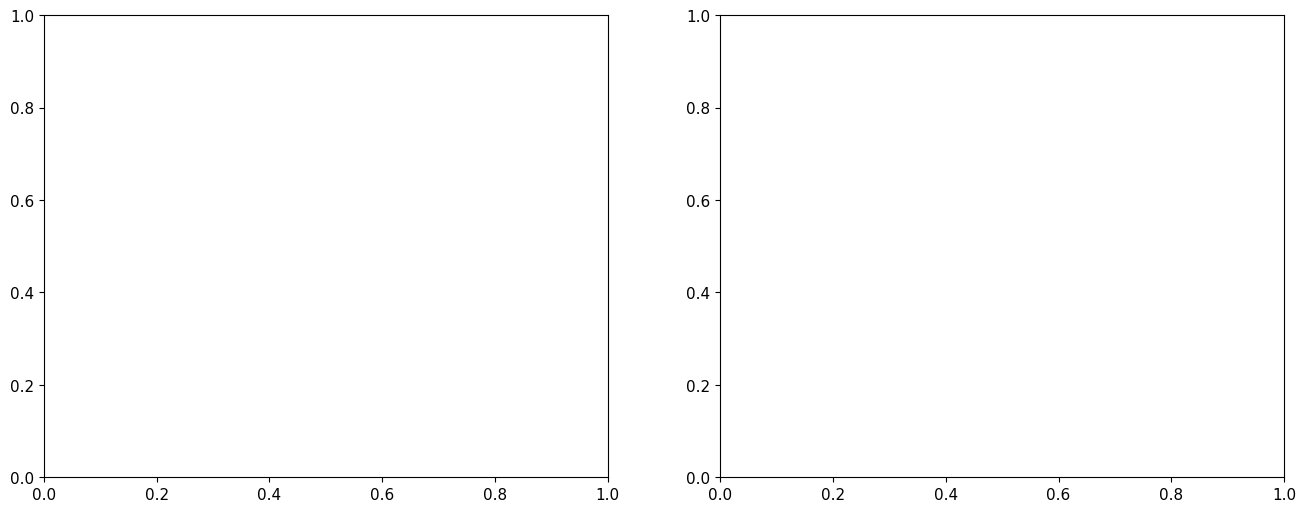

In [63]:
sample_sorted = np.sort(sample)

# Теоретическая функция распределения
x_range = np.linspace(0.01, np.max(sample)*1.2, 1000)
theoretical_cdf = lognorm.cdf(x_range, s=b_true, scale=np.exp(a_true))
theoretical_pdf = lognorm.pdf(x_range, s=b_true, scale=np.exp(a_true))
empirical_cdf = empirical_cdf_evaluate(sample, x_range)

# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Эмпирическая и теоретическая функции распределения
#axes[0].step(sample_sorted, empirical_cdf, where='post', label='Эмпирическая F(x)', linewidth=2, color='blue')
axes[0].plot(sample_sorted, empirical_cdf, label='Эмпирическая F(x)', linewidth=2, color='blue')
axes[0].plot(x_range, theoretical_cdf, label='Теоретическая F(x)', linewidth=2, color='red', linestyle='--')
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('F(x)', fontsize=12)
axes[0].set_title('Функция распределения', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# Гистограмма и теоретическая плотность
axes[1].hist(sample, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label='Эмпирическая плотность')
axes[1].plot(x_range, theoretical_pdf, label='Теоретическая f(x)', linewidth=2, color='red', linestyle='--')
axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('f(x)', fontsize=12)
axes[1].set_title('Плотность распределения', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
print(empirical_cdf_evaluate(sample, 8.35))

## Шаг 4. Точечные оценки математического ожидания и дисперсии

Для логнормального распределения с параметрами μ и σ:

$$E[X] = e^{\mu + \sigma^2/2}$$

$$Var[X] = (e^{\sigma^2} - 1) \cdot e^{2\mu + \sigma^2}$$

In [ ]:
# Точечные оценки
sample_mean = np.mean(sample)
sample_var = np.var(sample, ddof=1)
sample_std = np.sqrt(sample_var)

# Теоретические значения
theoretical_mean = np.exp(a_true + b_true**2 / 2)
theoretical_var = (np.exp(b_true**2) - 1) * np.exp(2*a_true + b_true**2)
theoretical_std = np.sqrt(theoretical_var)

print("ТОЧЕЧНЫЕ ОЦЕНКИ МАТЕМАТИЧЕСКОГО ОЖИДАНИЯ И ДИСПЕРСИИ")
print(f"\nТочечное среднее: {sample_mean:.6f}")
print(f"Теоретическое среднее: {theoretical_mean:.6f}")
print(f"Относительная ошибка: {abs(sample_mean - theoretical_mean)/theoretical_mean * 100:.2f}%")

print(f"\nТочечная дисперсия: {sample_var:.6f}")
print(f"Теоретическая дисперсия: {theoretical_var:.6f}")
print(f"Относительная ошибка: {abs(sample_var - theoretical_var)/theoretical_var * 100:.2f}%")

print(f"\nТочечное стд. отклонение: {sample_std:.6f}")
print(f"Теоретическое стд. отклонение: {theoretical_std:.6f}")

ТОЧЕЧНЫЕ ОЦЕНКИ МАТЕМАТИЧЕСКОГО ОЖИДАНИЯ И ДИСПЕРСИИ

Выборочное среднее: 4.024173
Теоретическое среднее: 4.075527
Относительная ошибка: 1.26%

Выборочная дисперсия: 18.509099
Теоретическая дисперсия: 20.727650
Относительная ошибка: 10.70%

Выборочное стд. отклонение: 4.302220
Теоретическое стд. отклонение: 4.552763


## Шаг 5. Метод scipy.stats для оценки параметров


In [ ]:
# Оценка параметров методом scipy.stats
# lognorm.fit возвращает: (shape, loc, scale)
# где shape = s (sigma), scale = exp(mu)
shape_scipy, loc_scipy, scale_scipy = lognorm.fit(sample, floc=0)

# Извлечение параметров
sigma_scipy = shape_scipy
mu_scipy = np.log(scale_scipy)

print("МЕТОД SCIPY.STATS")
print(f"Оценка σ (sigma): {sigma_scipy:.6f}")
print(f"Оценка μ (mu): {mu_scipy:.6f}")
print(f"\nИсходные параметры:")
print(f"σ (b): {b_true}")
print(f"μ (a): {a_true}")
print(f"\nОтносительные ошибки:")
print(f"Ошибка σ: {abs(sigma_scipy - b_true)/b_true * 100:.2f}%")
print(f"Ошибка μ: {abs(mu_scipy - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_scipy):.2f}%")

МЕТОД SCIPY.STATS
Оценка σ (sigma): 0.934579
Оценка μ (mu): 0.961645

Исходные параметры:
σ (b): 0.9
μ (a): 1

Относительные ошибки:
Ошибка σ: 3.84%
Ошибка μ: 3.84%


## Шаг 6. Метод моментов

### Теория метода моментов для логнормального распределения

Для логнормального распределения:

**Моменты относительно нуля:**
$$\mu_k = E[X^k] = e^{k\mu + k^2\sigma^2/2}$$

**Центральные моменты:**
$$\mu_2 = Var[X] = (e^{\sigma^2} - 1) \cdot e^{2\mu + \sigma^2}$$

**Коэффициенты асимметрии и эксцесса:**
$$\alpha_1 = \text{skewness} = (e^{\sigma^2} + 2)\sqrt{e^{\sigma^2} - 1}$$

$$\alpha_2 = \text{excess kurtosis} = e^{4\sigma^2} + 2e^{3\sigma^2} + 3e^{2\sigma^2} - 6$$

In [ ]:
# Выборочные моменты
m1 = sample_mean  # первый момент (среднее)
m2_central = sample_var  # второй центральный момент (дисперсия)
alpha1_sample = skew(sample)  # коэффициент асимметрии
alpha2_sample = kurtosis(sample, fisher=False) - 3  # эксцесс (excess kurtosis)

print("Выборочные моменты и коэффициенты:")
print(f"μ₁ (среднее): {m1:.6f}")
print(f"μ₂ (дисперсия): {m2_central:.6f}")
print(f"α₁ (асимметрия): {alpha1_sample:.6f}")
print(f"α₂ (эксцесс): {alpha2_sample:.6f}")

Выборочные моменты и коэффициенты:
μ₁ (среднее): 4.024173
μ₂ (дисперсия): 18.509099
α₁ (асимметрия): 2.490236
α₂ (эксцесс): 7.680857


### 6.1. Метод моментов: α₁ и μ₂

Используем коэффициент асимметрии и дисперсию.

In [ ]:
# Метод моментов: α₁ и μ₂
# Из α₁ = (e^(σ²) + 2)√(e^(σ²) - 1) находим σ
# Пусть w = e^(σ²), тогда α₁ = (w + 2)√(w - 1)
# α₁² = (w + 2)²(w - 1)

def solve_sigma_from_skewness(alpha1):
    """Решение для σ из коэффициента асимметрии"""
    def equation(w):
        if w <= 1:
            return 1e10
        return (w + 2)**2 * (w - 1) - alpha1**2
    
    # Начальное приближение
    w_solution = fsolve(equation, 2)[0]
    sigma = np.sqrt(np.log(w_solution))
    return sigma

sigma_mom1 = solve_sigma_from_skewness(alpha1_sample)

# Из дисперсии находим μ
# Var = (e^(σ²) - 1) * e^(2μ + σ²)
mu_mom1 = 0.5 * (np.log(m2_central / (np.exp(sigma_mom1**2) - 1)) - sigma_mom1**2)

print("МЕТОД МОМЕНТОВ: α₁ и μ₂")
print(f"Оценка σ: {sigma_mom1:.6f}")
print(f"Оценка μ: {mu_mom1:.6f}")
print(f"Ошибка σ: {abs(sigma_mom1 - b_true)/b_true * 100:.2f}%")
print(f"Ошибка μ: {abs(mu_mom1 - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_mom1):.2f}%")

МЕТОД МОМЕНТОВ: α₁ и μ₂
Оценка σ: 0.639282
Оценка μ: 1.596556
Ошибка σ: 28.97%
Ошибка μ: 59.66%


### 6.2. Метод моментов: α₂ и μ₂

Используем эксцесс и дисперсию.

In [ ]:
# Метод моментов: α₂ и μ₂
# Из α₂ = e^(4σ²) + 2e^(3σ²) + 3e^(2σ²) - 6 находим σ

def solve_sigma_from_kurtosis(alpha2):
    """Решение для σ из эксцесса"""
    def equation(sigma):
        return (np.exp(4*sigma**2) + 2*np.exp(3*sigma**2) + 
                3*np.exp(2*sigma**2) - 6 - alpha2)
    
    sigma_solution = fsolve(equation, 0.5)[0]
    return abs(sigma_solution)

sigma_mom2 = solve_sigma_from_kurtosis(alpha2_sample)

# Из дисперсии находим μ
mu_mom2 = 0.5 * (np.log(m2_central / (np.exp(sigma_mom2**2) - 1)) - sigma_mom2**2)

print("МЕТОД МОМЕНТОВ: α₂ и μ₂")
print(f"Оценка σ: {sigma_mom2:.6f}")
print(f"Оценка μ: {mu_mom2:.6f}")
print(f"Ошибка σ: {abs(sigma_mom2 - b_true)/b_true * 100:.2f}%")
print(f"Ошибка μ: {abs(mu_mom2 - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_mom2):.2f}%")

МЕТОД МОМЕНТОВ: α₂ и μ₂
Оценка σ: 0.547140
Оценка μ: 1.835794
Ошибка σ: 39.21%
Ошибка μ: 83.58%


### 6.3. Метод моментов: α₁ и α₂

Используем коэффициент асимметрии и эксцесс.

In [ ]:
# Метод моментов: α₁ и α₂
# Используем оба коэффициента для определения σ, затем из среднего находим μ

def solve_sigma_from_skew_kurt(alpha1, alpha2):
    """Решение для σ из асимметрии и эксцесса"""
    def equations(sigma):
        w = np.exp(sigma**2)
        skew_eq = (w + 2) * np.sqrt(w - 1) - alpha1
        kurt_eq = w**4 + 2*w**3 + 3*w**2 - 6 - alpha2
        # Используем только одно уравнение (асимметрия более стабильна)
        return skew_eq
    
    sigma_solution = fsolve(equations, 0.5)[0]
    return abs(sigma_solution)

sigma_mom3 = solve_sigma_from_skewness(alpha1_sample)

# Из среднего находим μ
# E[X] = e^(μ + σ²/2)
mu_mom3 = np.log(m1) - sigma_mom3**2 / 2

print("МЕТОД МОМЕНТОВ: α₁ и α₂")
print(f"Оценка σ: {sigma_mom3:.6f}")
print(f"Оценка μ: {mu_mom3:.6f}")
print(f"Ошибка σ: {abs(sigma_mom3 - b_true)/b_true * 100:.2f}%")
print(f"Ошибка μ: {abs(mu_mom3 - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_mom3):.2f}%")

МЕТОД МОМЕНТОВ: α₁ и α₂
Оценка σ: 0.639282
Оценка μ: 1.187979
Ошибка σ: 28.97%
Ошибка μ: 18.80%


## Шаг 7. Метод максимального правдоподобия (MLE)

### Вывод формул МНП для логнормального распределения

Функция правдоподобия:
$$L(\mu, \sigma | x_1, ..., x_n) = \prod_{i=1}^{n} \frac{1}{x_i \sigma \sqrt{2\pi}} \exp\left(-\frac{(\ln x_i - \mu)^2}{2\sigma^2}\right)$$

Логарифм функции правдоподобия:
$$\ln L = -n\ln(\sigma) - \frac{n}{2}\ln(2\pi) - \sum_{i=1}^{n}\ln(x_i) - \frac{1}{2\sigma^2}\sum_{i=1}^{n}(\ln x_i - \mu)^2$$

Производные и приравнивание к нулю дают:

$$\hat{\mu}_{MLE} = \frac{1}{n}\sum_{i=1}^{n}\ln x_i$$

$$\hat{\sigma}_{MLE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(\ln x_i - \hat{\mu})^2}$$

In [ ]:
# Метод максимального правдоподобия
log_sample = np.log(sample)

# Оценки МНП
mu_mle = np.mean(log_sample)
sigma_mle = np.std(log_sample, ddof=0)  # ddof=0 для МНП (смещенная оценка)

print("МЕТОД МАКСИМАЛЬНОГО ПРАВДОПОДОБИЯ (MLE)")
print("\nФормулы МНП:")
print("μ̂ = (1/n) Σ ln(xᵢ)")
print("σ̂ = √[(1/n) Σ (ln(xᵢ) - μ̂)²]")
print("\nРезультаты:")
print(f"Оценка μ: {mu_mle:.6f}")
print(f"Оценка σ: {sigma_mle:.6f}")
print(f"\nИсходные параметры:")
print(f"μ (a): {a_true}")
print(f"σ (b): {b_true}")
print(f"\nОтносительные ошибки:")
print(f"Ошибка μ: {abs(mu_mle - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_mle):.2f}%")
print(f"Ошибка σ: {abs(sigma_mle - b_true)/b_true * 100:.2f}%")

МЕТОД МАКСИМАЛЬНОГО ПРАВДОПОДОБИЯ (MLE)

Формулы МНП:
μ̂ = (1/n) Σ ln(xᵢ)
σ̂ = √[(1/n) Σ (ln(xᵢ) - μ̂)²]

Результаты:
Оценка μ: 0.961645
Оценка σ: 0.934579

Исходные параметры:
μ (a): 1
σ (b): 0.9

Относительные ошибки:
Ошибка μ: 3.84%
Ошибка σ: 3.84%


## Шаг 8. Сводная таблица результатов (Таблица 2)

In [ ]:
# Создание сводной таблицы
results_table = pd.DataFrame({
    'Метод': [
        'Заданные (из табл.1)',
        'Метод scipy.stats',
        'Метод моментов (α₁ и μ₂)',
        'Метод моментов (α₂ и μ₂)',
        'Метод моментов (α₁ и α₂)',
        'Метод макс. правдоподобия'
    ],
    'μ (a)': [
        f'{a_true:.6f}',
        f'{mu_scipy:.6f}',
        f'{mu_mom1:.6f}',
        f'{mu_mom2:.6f}',
        f'{mu_mom3:.6f}',
        f'{mu_mle:.6f}'
    ],
    'σ (b)': [
        f'{b_true:.6f}',
        f'{sigma_scipy:.6f}',
        f'{sigma_mom1:.6f}',
        f'{sigma_mom2:.6f}',
        f'{sigma_mom3:.6f}',
        f'{sigma_mle:.6f}'
    ],
    'Ошибка μ (%)': [
        '0.00',
        f'{abs(mu_scipy - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_scipy):.2f}',
        f'{abs(mu_mom1 - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_mom1):.2f}',
        f'{abs(mu_mom2 - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_mom2):.2f}',
        f'{abs(mu_mom3 - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_mom3):.2f}',
        f'{abs(mu_mle - a_true)/abs(a_true) * 100 if a_true != 0 else abs(mu_mle):.2f}'
    ],
    'Ошибка σ (%)': [
        '0.00',
        f'{abs(sigma_scipy - b_true)/b_true * 100:.2f}',
        f'{abs(sigma_mom1 - b_true)/b_true * 100:.2f}',
        f'{abs(sigma_mom2 - b_true)/b_true * 100:.2f}',
        f'{abs(sigma_mom3 - b_true)/b_true * 100:.2f}',
        f'{abs(sigma_mle - b_true)/b_true * 100:.2f}'
    ]
})

print("ТАБЛИЦА 2. СРАВНЕНИЕ МЕТОДОВ ОЦЕНКИ ПАРАМЕТРОВ")
print(results_table.to_string(index=False))

ТАБЛИЦА 2. СРАВНЕНИЕ МЕТОДОВ ОЦЕНКИ ПАРАМЕТРОВ
                    Метод    μ (a)    σ (b) Ошибка μ (%) Ошибка σ (%)
     Заданные (из табл.1) 1.000000 0.900000         0.00         0.00
        Метод scipy.stats 0.961645 0.934579         3.84         3.84
 Метод моментов (α₁ и μ₂) 1.596556 0.639282        59.66        28.97
 Метод моментов (α₂ и μ₂) 1.835794 0.547140        83.58        39.21
 Метод моментов (α₁ и α₂) 1.187979 0.639282        18.80        28.97
Метод макс. правдоподобия 0.961645 0.934579         3.84         3.84


## Шаг 9. Построение функций и плотностей для всех методов

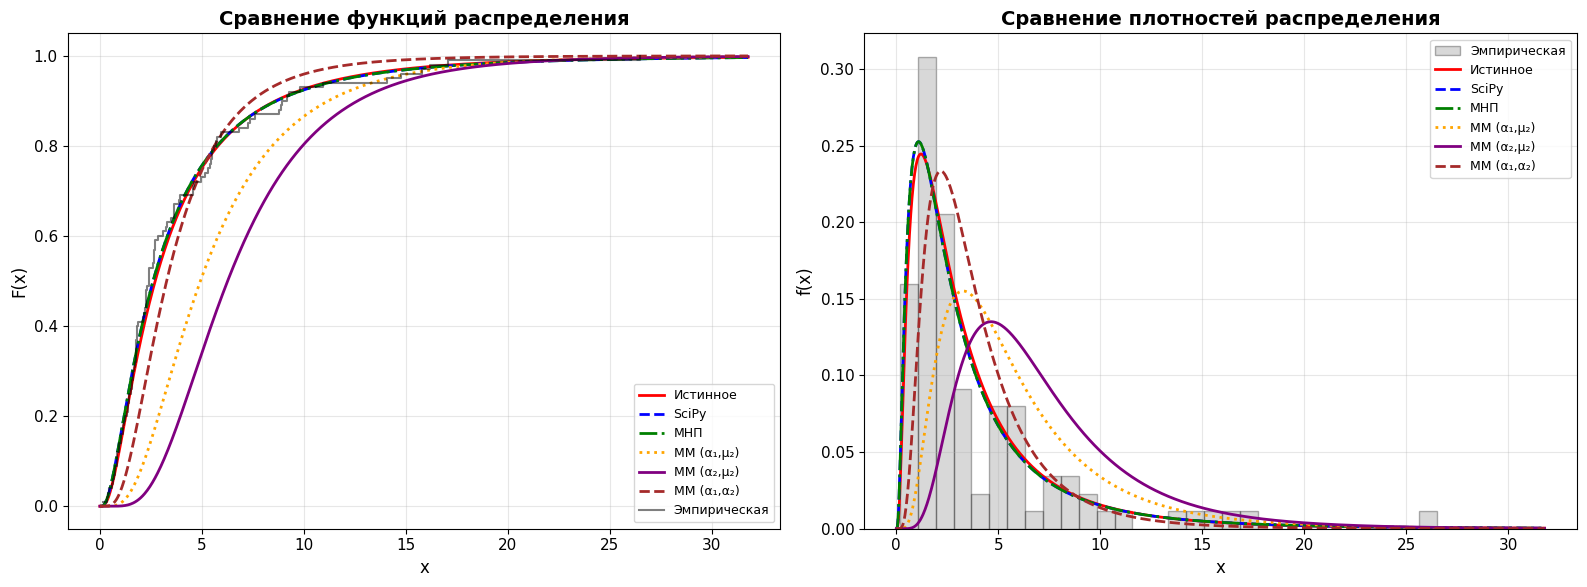

In [ ]:
# Подготовка данных для сравнения
x_range = np.linspace(0.01, np.max(sample)*1.2, 1000)

# Теоретические распределения для разных методов
methods = {
    'Истинное': (a_true, b_true),
    'SciPy': (mu_scipy, sigma_scipy),
    'МНП': (mu_mle, sigma_mle),
    'ММ (α₁,μ₂)': (mu_mom1, sigma_mom1),
    'ММ (α₂,μ₂)': (mu_mom2, sigma_mom2),
    'ММ (α₁,α₂)': (mu_mom3, sigma_mom3)
}

colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
linestyles = ['-', '--', '-.', ':', '-', '--']

# Графики
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Функции распределения
for (name, (mu, sigma)), color, ls in zip(methods.items(), colors, linestyles):
    cdf = lognorm.cdf(x_range, s=sigma, scale=np.exp(mu))
    axes[0].plot(x_range, cdf, label=name, color=color, linestyle=ls, linewidth=2)

axes[0].step(sample_sorted, empirical_cdf, where='post', label='Эмпирическая', 
             linewidth=1.5, color='black', alpha=0.5)
axes[0].set_xlabel('x', fontsize=12)
axes[0].set_ylabel('F(x)', fontsize=12)
axes[0].set_title('Сравнение функций распределения', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Плотности распределения
axes[1].hist(sample, bins=30, density=True, alpha=0.3, color='gray', edgecolor='black', label='Эмпирическая')

for (name, (mu, sigma)), color, ls in zip(methods.items(), colors, linestyles):
    pdf = lognorm.pdf(x_range, s=sigma, scale=np.exp(mu))
    axes[1].plot(x_range, pdf, label=name, color=color, linestyle=ls, linewidth=2)

axes[1].set_xlabel('x', fontsize=12)
axes[1].set_ylabel('f(x)', fontsize=12)
axes[1].set_title('Сравнение плотностей распределения', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Шаг 10. Статистический анализ качества оценок

In [ ]:
# Вычисление среднеквадратичных ошибок для всех методов
mse_data = []

for name, (mu_est, sigma_est) in methods.items():
    if name == 'Истинное':
        continue
    
    mse_mu = (mu_est - a_true)**2
    mse_sigma = (sigma_est - b_true)**2
    total_mse = mse_mu + mse_sigma
    
    mse_data.append({
        'Метод': name,
        'MSE(μ)': f'{mse_mu:.8f}',
        'MSE(σ)': f'{mse_sigma:.8f}',
        'Total MSE': f'{total_mse:.8f}'
    })

mse_df = pd.DataFrame(mse_data)

print("СРЕДНЕКВАДРАТИЧНЫЕ ОШИБКИ ОЦЕНОК")
print(mse_df.to_string(index=False))

СРЕДНЕКВАДРАТИЧНЫЕ ОШИБКИ ОЦЕНОК
     Метод     MSE(μ)     MSE(σ)  Total MSE
     SciPy 0.00147112 0.00119573 0.00266685
       МНП 0.00147112 0.00119573 0.00266685
ММ (α₁,μ₂) 0.35587854 0.06797400 0.42385254
ММ (α₂,μ₂) 0.69855147 0.12451002 0.82306149
ММ (α₁,α₂) 0.03533600 0.06797400 0.10331000
